In [285]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [286]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [287]:
df = pd.read_csv('C:/Users/Нина/Desktop/ML/Lessons/data.csv')

In [288]:
df.shape

(569, 33)

In [289]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [290]:
df[::50]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
50,857343,B,11.76,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.01115,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,NaN
100,862717,M,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.04489,...,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397,NaN
150,871001501,B,13.00,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,...,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435,NaN
200,877501,B,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.04107,...,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174,NaN
250,884948,M,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.271200,0.13100,...,27.00,165.30,2010.0,0.12110,0.31720,0.69910,0.21050,0.3126,0.07849,NaN
300,892438,M,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.10620,...,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929,NaN
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
400,90439701,M,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,...,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980,NaN
450,9111596,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.02386,...,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952,NaN


In [291]:
df.info() # проверим наличие пропусков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [292]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Проверим есть ли пропущенные данные

In [293]:
df.isnull().sum() 



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Рассмотрим целевую переменную

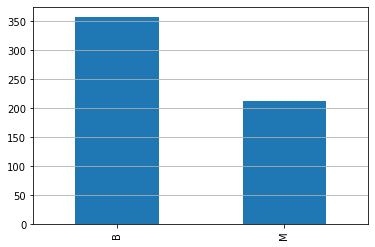

In [294]:
df['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [295]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

## столбцы Unnamed:32 и id для удобства визуализации можно удалить 

In [296]:
df = df.drop(['id', 'Unnamed: 32'],axis=1)

In [297]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Построим гистограммы распределения


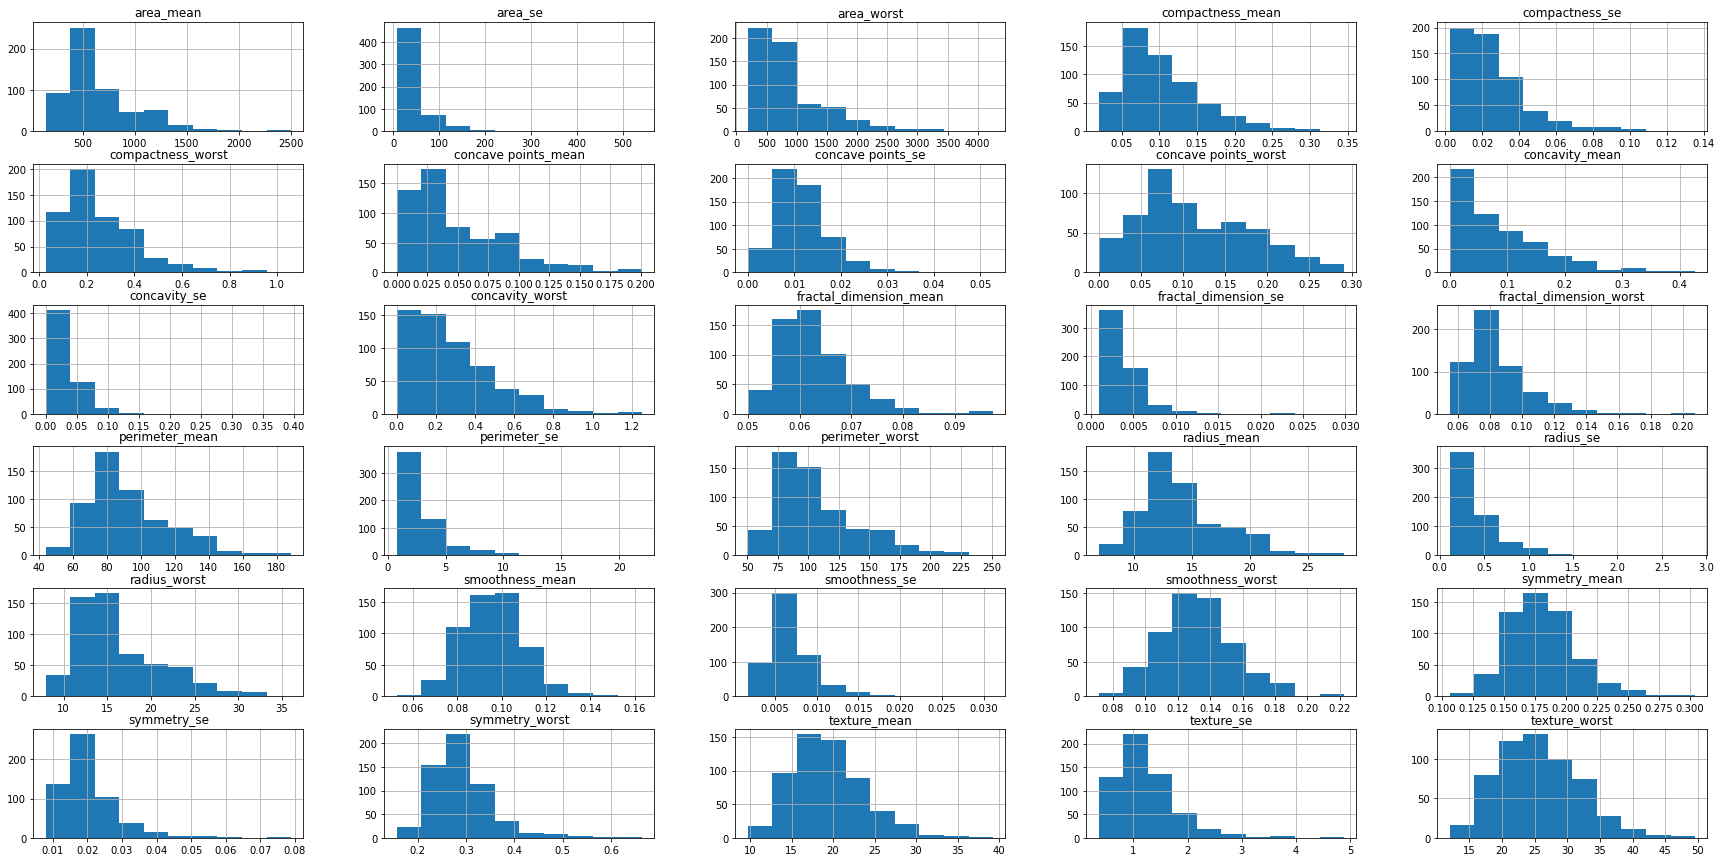

In [298]:
df.hist(figsize=(30, 15));

## Выведем корреляцию

In [299]:
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# Построим heat map

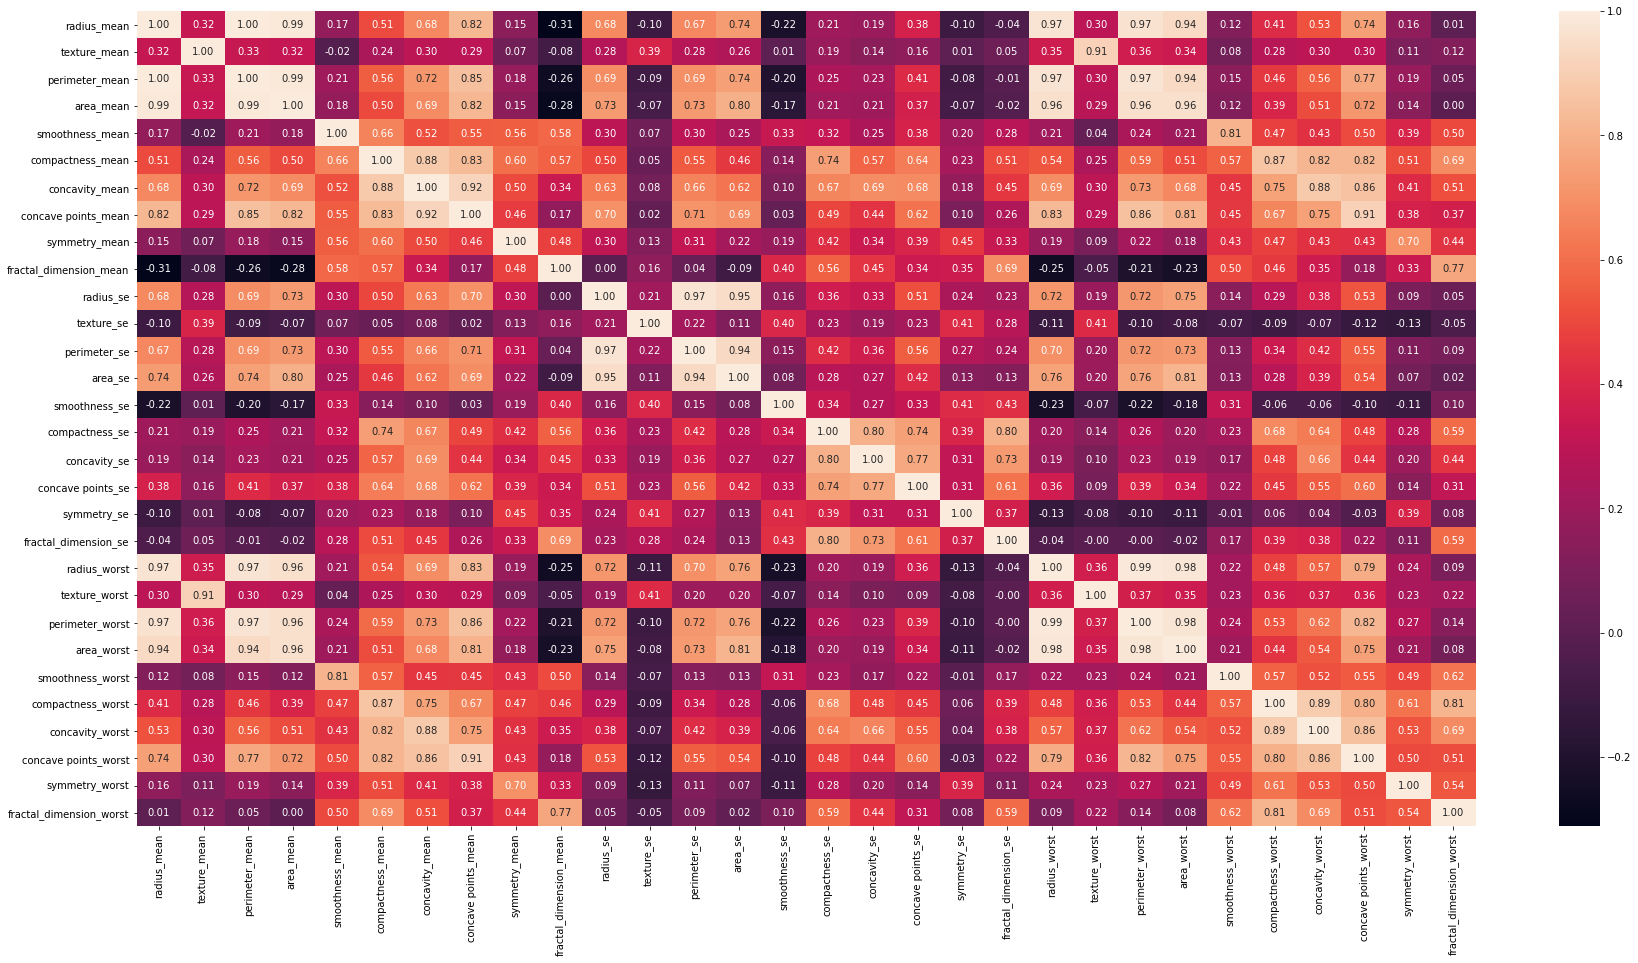

In [300]:
plt.figure(figsize=(30,15));
sns.heatmap(corr, annot=True, fmt='.2f');

# Находим пары признаков с корреляцией больше 0.8

In [301]:

CorField = []
for i in corr:
    for j in corr.index[corr[i] > 0.8]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, corr[i][corr.index == j].values[0])

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean concave points_mean 0.8225285223871791
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
smoothness_mean smoothness_worst 0.8053241954943631
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
compactness_mean concavity_worst 0.8162752498000281
compactness_mean concave points_worst 0.8155732235690654
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099
compactness_se concavity_se 0.8012683427383301
compactness_se fractal_dimension_se 0.8032688176617685


## Построим графики парных корреляций с метками ЦП

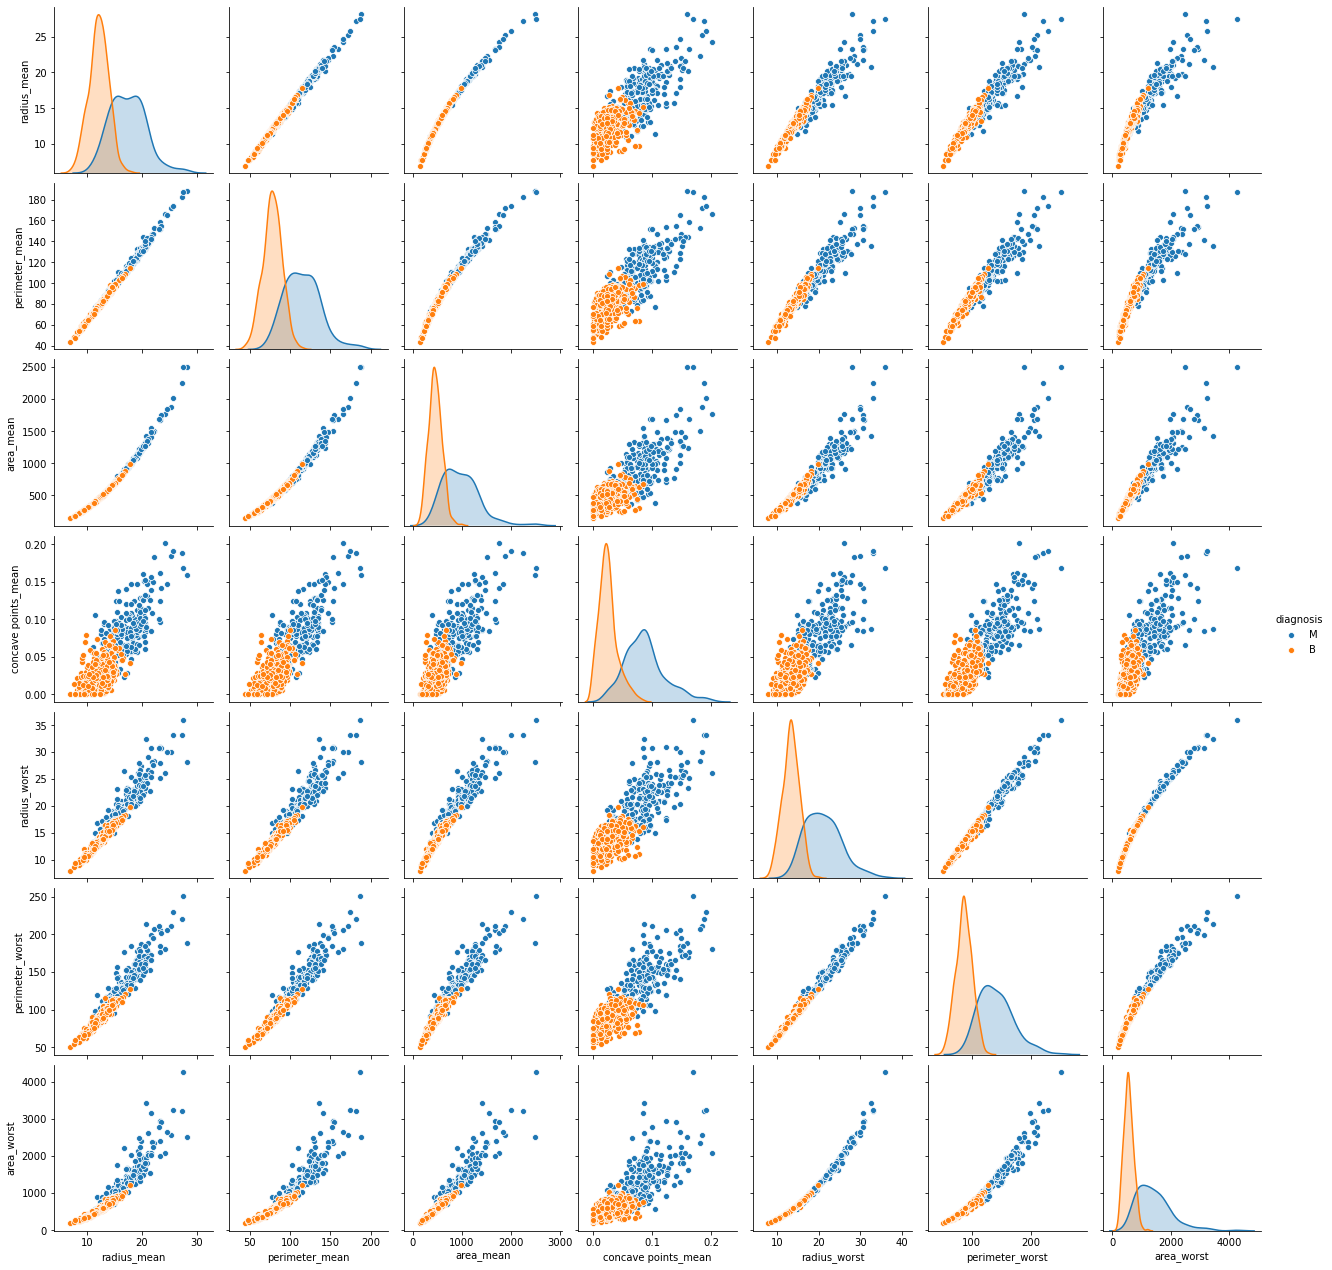

In [302]:
sns.pairplot(df[['radius_mean', 'perimeter_mean', 'area_mean','concave points_mean','radius_worst', 'perimeter_worst', 'area_worst', 'diagnosis']], hue='diagnosis');

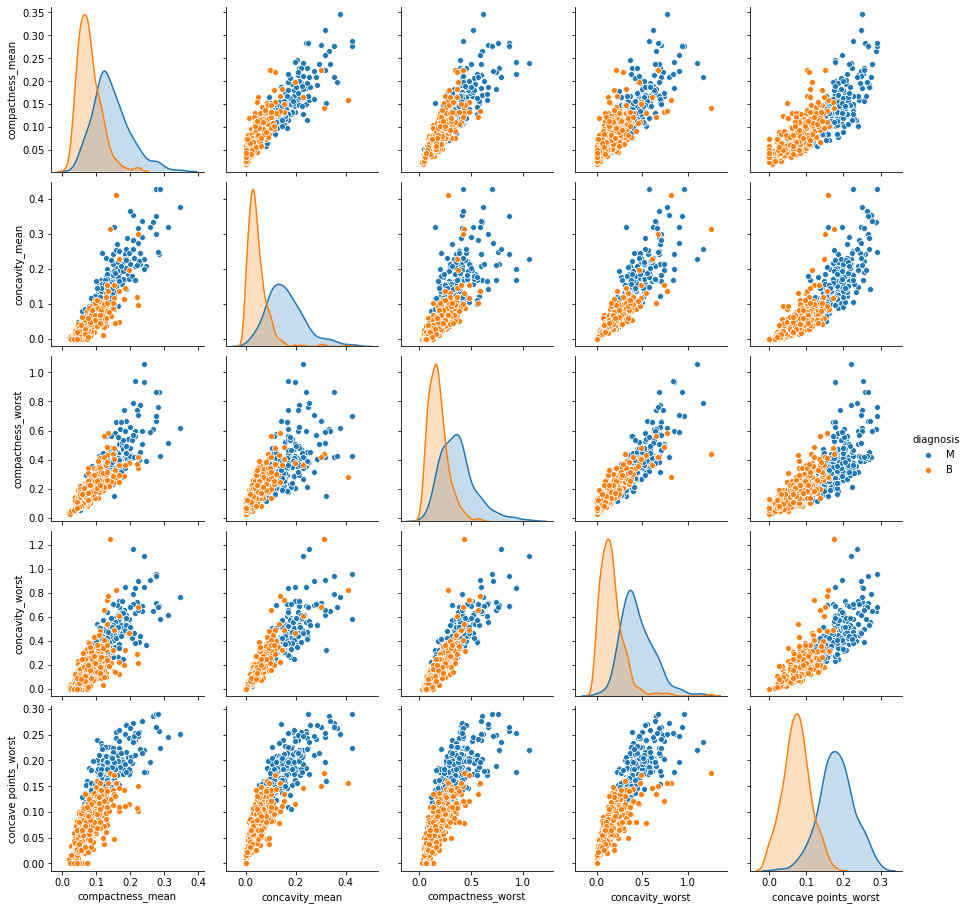

In [303]:
sns.pairplot(df[['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'diagnosis']], hue='diagnosis');

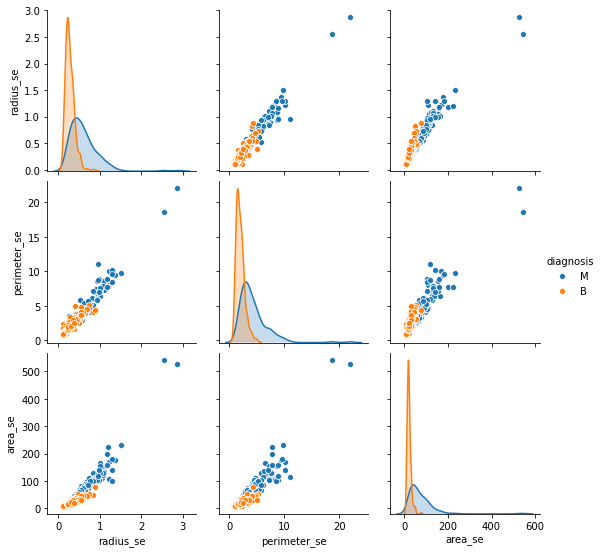

In [304]:
sns.pairplot(df[['radius_se', 'perimeter_se', 'area_se', 'diagnosis']], hue='diagnosis');

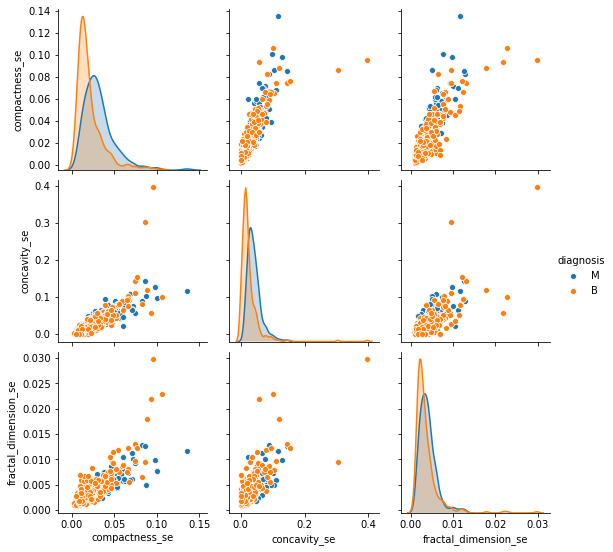

In [305]:
sns.pairplot(df[['compactness_se', 'concavity_se', 'fractal_dimension_se', 'diagnosis']], hue='diagnosis');

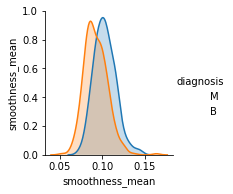

In [306]:
sns.pairplot(df[['smoothness_mean', 'diagnosis']], hue='diagnosis');

## Выведем boxplot с ЦП

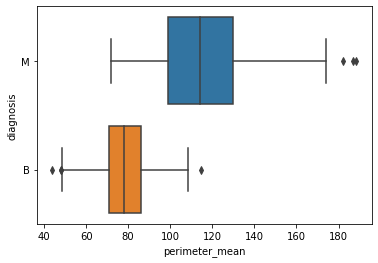

In [307]:
sns.boxplot(x='perimeter_mean',y='diagnosis', data=df)

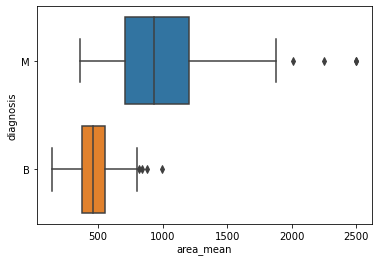

In [308]:
sns.boxplot(x='area_mean',y='diagnosis', data=df)

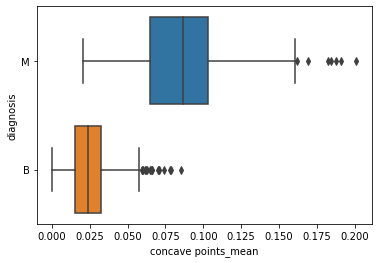

In [309]:
sns.boxplot(x='concave points_mean',y='diagnosis', data=df)

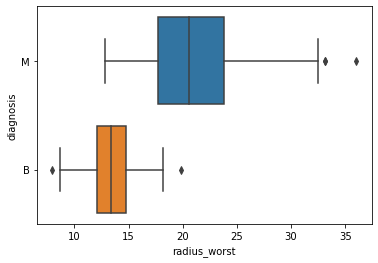

In [310]:
sns.boxplot(x='radius_worst',y='diagnosis', data=df)

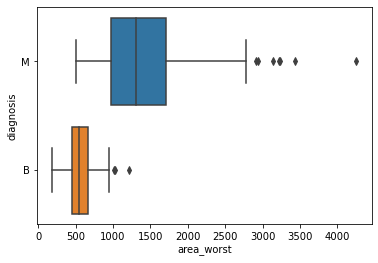

In [311]:
sns.boxplot(x='area_worst',y='diagnosis', data=df)

In [312]:
##Очевидно,что на первый взгляд предположить о свойстве опухоли можно по следующим признакам: perimeter_mean, area_mean, concave points_mean,radius_worst,area_worst'       

## Перекодируем целевую переменную

In [313]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [314]:
df[::50]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
50,0,11.76,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.01115,0.1495,...,12.98,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
100,1,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.04489,0.1609,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
150,0,13.00,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,...,14.16,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
200,0,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.04107,0.1979,...,14.44,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174
250,1,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.271200,0.13100,0.2205,...,25.58,27.00,165.30,2010.0,0.12110,0.31720,0.69910,0.21050,0.3126,0.07849
300,1,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.10620,0.1792,...,25.93,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
350,0,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
400,1,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,0.2113,...,20.80,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980
450,0,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.02386,0.1349,...,12.79,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952


# Ч.2 KNN

## Разбиваем dataframe на train-test

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

In [318]:
# аргумент stratify разбивает датафрейм на train/test пропорционально ЦП

In [319]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((398, 30), (171, 30), (398,), (171,))

In [320]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [321]:

y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

## Нормализуем наши данные

In [322]:
## Многие данные находятся в разных шкалах,поэтому их необходимо нормализовать

In [353]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучим модель (по умолчанию кол. соседей = 5)

In [354]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

## Посмотрим оценки по метрикам

In [355]:
print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.970
Precision: 0.926
Recall: 0.993
f1_score: 0.958

Test quality:
Accuracy: 0.971
Precision: 0.922
Recall: 1.000
f1_score: 0.959


## Построим ROC-AUC и посчитаем площадь под ней

In [356]:
from sklearn.metrics import roc_auc_score, roc_curve

In [357]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

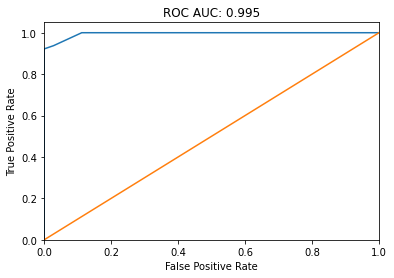

In [358]:
plot_roc_curve(knn.predict_proba(X_test_scaled)[:,1], y_test)

## проверим на K = 8 

In [359]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=8)

In [360]:
print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.957
Precision: 0.892
Recall: 0.992
f1_score: 0.940

Test quality:
Accuracy: 0.930
Precision: 0.828
Recall: 0.981
f1_score: 0.898


In [361]:
## на К=8 показатели стали хуже

## пробуем подобрать параметр K

In [362]:
from sklearn.model_selection import cross_val_score

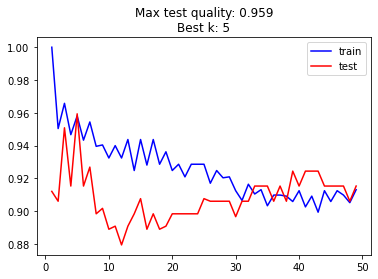

In [363]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();



## Подберём оптимальное значение K с помощью GridSearchCV

In [364]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best CV score: 0.953, best CV k: 5


[Parallel(n_jobs=1)]: Done 735 out of 735 | elapsed:   12.4s finished


 ## сделаем то же самое на RandomizedSearchCV 

In [365]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40, verbose=1)
rand_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
) 

test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best CV score: 0.938, best CV k: 4
Resulting test score: 0.897


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


In [336]:
## Видим,что оптимальное К = 5 и GridSearchCV сработал точнее,чем RandomizedSearchCV. Так что при небольших фреймах лучше использовать первый метод

## Применим логистическую регрессию

In [337]:
## Поскольку логистическая регрессия плохо относится к линейно-зависимым признакам, уберём переменные, корреляция между которыми превышает 0.85

In [366]:
CorField = []
for i in corr:
    for j in corr.index[corr[i] > 0.85]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, corr[i][corr.index == j].values[0])

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
concave points_mean concave points_worst 0.9101553142985934
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099


In [367]:
df1 = df.drop([
    'perimeter_mean','area_mean','radius_worst','area_worst','texture_worst','concavity_mean',
    'compactness_worst','concave points_worst','perimeter_se','area_se'],axis=1
)


df1.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,184.60,0.1622,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,158.80,0.1238,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,152.50,0.1444,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,98.87,0.2098,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,152.20,0.1374,0.4000,0.2364,0.07678


In [368]:
X = df1.drop(['diagnosis'], axis=1)
y = df1['diagnosis']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

In [370]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((398, 20), (171, 20), (398,), (171,))

In [371]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(logreg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(logreg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.987
Precision: 0.966
Recall: 1.000
f1_score: 0.983

Test quality:
Accuracy: 0.977
Precision: 0.938
Recall: 1.000
f1_score: 0.968


In [345]:
## Очевидно,что логистическая регрессия опережает KNN по всем показателям и даёт более точные предсказания

## Построим ROC-AUC для лог.регрессии

In [372]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

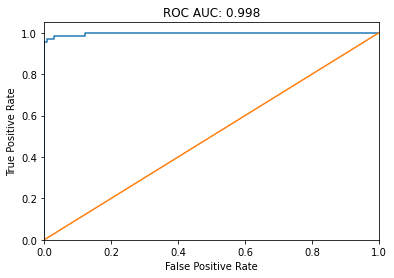

In [380]:
plot_roc_curve(logreg.predict_proba(X_test_scaled)[:,1], y_test)

## Посмотрим на кросс-валидации

In [385]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV()

logreg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(logreg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(logreg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.987
Precision: 0.966
Recall: 1.000
f1_score: 0.983

Test quality:
Accuracy: 0.982
Precision: 0.953
Recall: 1.000
f1_score: 0.976


In [387]:
## Кросс-валидация даёт ещё более точную оценку

In [346]:
## Определим по весам наиболее значимые данные,по кот.можно судить о качестве опухоли

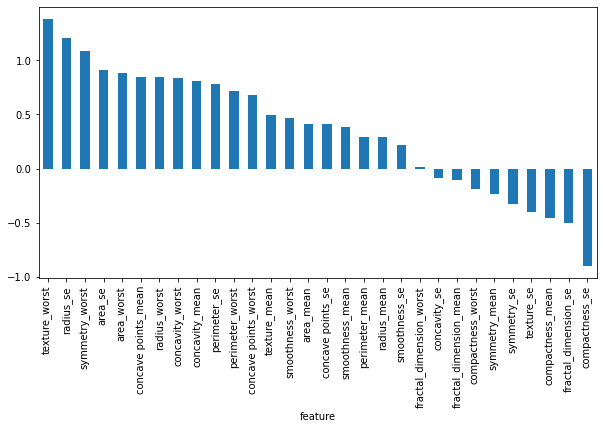

In [347]:
plt.figure(figsize=(10,5));
featureImportance = pd.DataFrame({"feature": df.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

## Из всего полученного можно сделать однозначный вывод,что Логистическая регрессия даёт более точную  оценку ,чем KNN
## но на небольших фреймах можно использовать KNN, т.к. он менее затратен 